# Одномерная фильтрация

## Однофазная фильтрация несжимаемой жидкости

### Уравнения

Уравнения неразрывности и движения для однофазного потока в неупругой пористой среде
$$ \begin{cases}
\frac{\partial \rho}{\partial t} + \nabla \cdot (\rho \vec{v}) = 0 \\
\vec{v} = -\frac{k}{\mu} \nabla P \\
\end{cases} $$

Пусть $\rho = const$

$$ \begin{cases}
\nabla \cdot  \vec{v} = 0 \\
\vec{v} = -\frac{k}{\mu} \nabla P \\
\end{cases} $$

Пусть поток одномерен

$$ \begin{cases}
\frac{d v}{d x} = 0 \\
v = -\frac{k}{\mu} \frac{d P}{d x} \\
\end{cases} $$

### Численное решение

Дискретизируем методом конечных разностей

$$ \begin{cases}
\frac{v_{i+1} - v_{i}}{h} = 0 \\
v_i = -\frac{k}{\mu} \frac{P_{i+1} - P_{i}}{h} \\
\end{cases} $$

Из первого уравнения следует

$$ P_{i-1} - 2P_{i} + P_{i+1} = 0 $$

Задача сводится к нахождению поля давления

![Разностная сетка](../data/grid1d.png)

Пусть расчетная область состоит из 5-и узловых точек, в первой и последней задаются граничные условия в виде давления, тогда система примет вид

$$
\begin{pmatrix}
-2 &  1 &  0 \\
1  & -2 &  1 \\
0  &  1 & -2 \\
\end{pmatrix} 
\cdot
\begin{pmatrix}
P_1 \\
P_2 \\
P_3 \\
\end{pmatrix}
=
\begin{pmatrix}
-P_0 \\
0 \\
-P_4 \\
\end{pmatrix}

$$
$$
\textbf{Ax} = \textbf{B}
$$

In [1]:
'''
If you are using Google Colab, uncomment the next line to download `SLAU.py` !!!
'''
# !wget -P /crc/ https://raw.githubusercontent.com/lnrsmglln/1D_filtration/main/SLAU.py

'\nIf you are using Google Colab, uncomment the next line to download `SLAU.py` !!!\n'

In [2]:
%load_ext autoreload
%autoreload 2

import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")
from src import SLAU

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Кол-во узловых точек
n = 5

# Длина расчетной области
L = 2

# Граничные условия (начало и конец расчетной области)
P0 = 2
Pn = 1

A = np.zeros([n-2, n-2])
for i in range(n-2):
    A[i][i] = -2
    if i < n-3:
        A[i][i+1] = 1
    if i > 0:
        A[i][i-1] = 1

B = np.zeros(n - 2)
B[0], B[-1] = -P0, -Pn

A

array([[-2.,  1.,  0.],
       [ 1., -2.,  1.],
       [ 0.,  1., -2.]])

In [4]:
c = 2 * np.ones(n-2)
a = b = np.ones(n-3)
f = np.zeros_like(c)
f[0] = P0
f[-1] = Pn

P_solve = SLAU.tridiagonal_solve(a, b, c, f)

In [5]:
P = np.zeros(n)

x = np.arange(0, L + L/n , L/(n - 1))

P[0] = P0
P[-1] = Pn
P[1:-1] = P_solve

P_numpy_solve = np.linalg.solve(A, B)
P_numpy_solve - P_solve

array([0.00000000e+00, 2.22044605e-16, 0.00000000e+00])

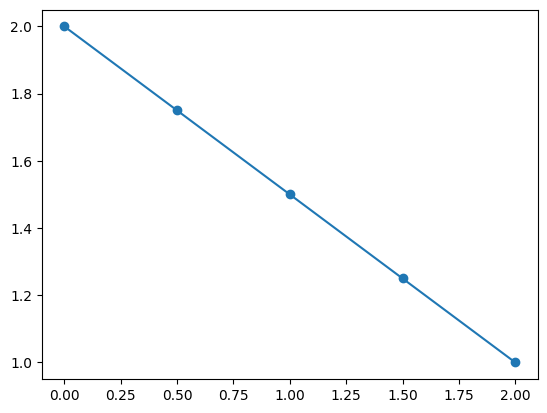

In [6]:
plt.plot(x, P, marker='o')
plt.show()